In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=416660 sha256=4ec305acfc6522006ad3685392022780d62df85f0ef81da6aa2566734eb6c5ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-19be_i34/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [2]:
data = pandas.read_csv('GSS2012a.csv')
data.head()

<ipython-input-2-3526d93b64be>:1: DtypeWarning: Columns (11,115,123,187,274,284,287,288,290,291,292,397,585,595,628,632) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pandas.read_csv('GSS2012a.csv')


,year,id,mar1,BMITZVAH,accntsci,age,sex,life,ENGDO,SCIENTBR,...,wrksch,wrkslf,wrkstat,wrkwayup,wwwhr,wwwmin,xmarsex,xmovie,xnorcsiz,zodiac
0,2012.0,1.0,MARRIED,NaN,NaN,22.0,MALE,EXCITING,NaN,NaN,...,WORK PART-TIME,SOMEONE ELSE,WORKING PARTTIME,AGREE SOMEWHAT,5.0,NaN,ALWAYS WRONG,NaN,"UNINC,MED CITY",LIBRA
1,2012.0,6.0,DIVORCED,NaN,NaN,50.0,FEMALE,NaN,NaN,NaN,...,WORK FULL-TIME,SOMEONE ELSE,OTHER,AGREE SOMEWHAT,0.0,0.0,SOMETIMES WRONG,NaN,"CITY,50-250000",TAURUS
2,2012.0,7.0,MARRIED,NaN,NaN,35.0,FEMALE,NaN,NaN,NaN,...,NaN,SOMEONE ELSE,KEEPING HOUSE,AGREE SOMEWHAT,2.0,NaN,NaN,NO,"CITY,50-250000",SCORPIO
3,2012.0,9.0,SEPARATED,NaN,NaN,28.0,FEMALE,ROUTINE,NaN,NaN,...,WORK PART-TIME,NaN,KEEPING HOUSE,AGREE STRONGLY,NaN,NaN,ALWAYS WRONG,NaN,"CITY,50-250000",LIBRA
4,2012.0,11.0,DIVORCED,NaN,NaN,55.0,MALE,ROUTINE,NaN,NaN,...,NaN,SOMEONE ELSE,OTHER,NaN,14.0,NaN,SOMETIMES WRONG,NaN,"SUBURB, MED CITY",PISCES


In [4]:
# Creating crosstable with 'mar1' and 'life' data columns

dataviz = pandas.crosstab(data['mar1'], data['life'])
dataviz

life,DULL,EXCITING,ROUTINE
mar1,,,
DIVORCED,10,111,79
MARRIED,20,354,269
NEVER MARRIED,14,134,115
SEPARATED,3,22,32
WIDOWED,14,39,55


<function matplotlib.pyplot.show(close=None, block=None)>

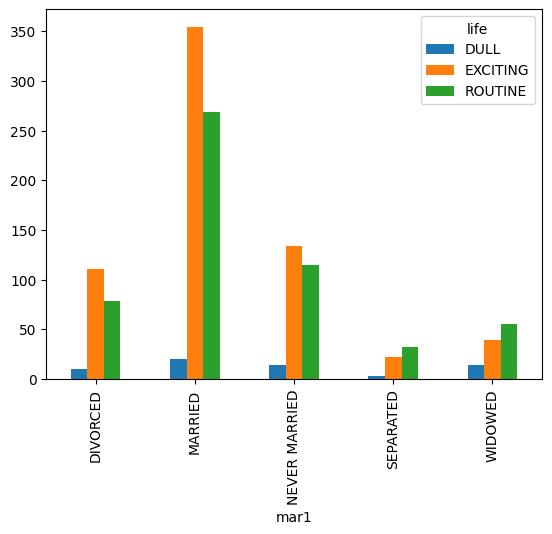

In [5]:
dataviz.plot(kind = 'bar')
plt.show

In [6]:
#H0 -  marital status vs feeling of life (no connection or no relationship)
#Ha -  marital status vs feeling of life ( connection or  relationship)

from scipy.stats import chi2_contingency

chi2_contingency(dataviz)

Chi2ContingencyResult(statistic=32.535800204049536, pvalue=7.464877390427598e-05, dof=8, expected_freq=array([[  9.59874115, 103.8552321 ,  86.54602675],
       [ 30.85995279, 333.8945712 , 278.245476  ],
       [ 12.62234461, 136.56963021, 113.80802518],
       [  2.73564123,  29.59874115,  24.66561762],
       [  5.18332022,  56.08182533,  46.73485445]]))

In [7]:
pvalue=7.464877390427598e-05

# H0 is rejected

In [9]:
# Calculating the effect size using Pearson Chi-square test

chi2table = ps.ts_pearson_ind(data['mar1'], data['life'])
chi2table


,n,n rows,n col.,statistic,df,p-value,min. exp.,prop. exp. below 5,test
0,1271.0,5,3,32.5358,8,0.000075,2.735641,0.066667,Pearson chi-square test of independence


In [10]:
n = chi2table['n'][0]
nrows = chi2table['n rows'][0]
ncols =  chi2table['n col.'][0]
stat = chi2table['statistic'][0]

ps.es_cramer_v_ind(stat, n, nrows, ncols)

0.11313395589484188

In [11]:
V = 0.11313395589484188

In [12]:
# Degree of freedom (df)

df = min(nrows, ncols)-1
df

2

In [13]:
if df == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif df == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

qual

'small'

The pearson chi square test found a relation between the marital status and the feeling of life and the cramer v test found the strength of association to be small.